# Module-6: Clustering for Diversification analysis

###### Loading required libraries

In [1]:
import os
import fnmatch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 6.1 & 6.2 

In [2]:
caps = ["Large_Cap","Mid_Cap","Small_Cap"]
dfs = {}
dailyValues = {}
annualValues = {}

for cap in caps:
    i=1
    
    for file_name in os.listdir(f"{cap}"):        
        if fnmatch.fnmatch(file_name, '*.csv') and i<11:
            name = file_name.split('.')[0]  # getting the name without extension
            dfs[name] = pd.read_csv(f'{cap}/{file_name}')  # making df out of csv file

            # preprocessing
            dfs[name] = dfs[name][dfs[name]["Series"] == "EQ"]   
            dfs[name].Date = pd.to_datetime(dfs[name]['Date'])
            dfs[name] = dfs[name].set_index('Date')
            
            # calculating values i.e. mean and std
            dfs[name]["dailyChange"] = dfs[name]["Close Price"].pct_change()
            dfs[name].dropna(inplace = True)
            
            # (std, mean)
            dailyValues[name] = [dfs[name].dailyChange.std(), dfs[name].dailyChange.mean()]
            annualValues[name] = [dailyValues[name][0]*(252**0.5), dailyValues[name][1]*252]
            
            i +=1
print('(name: [std, mean])')
print(' --  --  -- Daily')
for i in dailyValues.items():
    print(i)
    
print('')
print(' --  --  -- Annual')    
for i in annualValues.items():
    print(i)

(name: [std, mean])
 --  --  -- Daily
('ADANIPORTS', [0.01951245469630954, 0.00024007341911916127])
('ASIANPAINT', [0.013194849833696072, 0.0003888475213985988])
('AXISBANK', [0.01750714774825731, 0.0009253742541607662])
('BAJFINANCE', [0.020224782580317745, 0.0018029055588609634])
('BPCL', [0.027492132897466923, -0.0010373800396852265])
('CIPLA', [0.016029262906254137, 4.689093509911603e-05])
('DRREDDY', [0.01879232828907139, 0.0002700140485641426])
('EICHERMOT', [0.018909798917251173, -0.0007003338366123908])
('GAIL', [0.021318751256458386, -0.000208535330613738])
('HDFC', [0.01351584513510593, 0.0005474025881947133])
('ADANIPOWER', [0.03845991354522835, 0.001211399299009801])
('AJANTPHARM', [0.020924825327700465, -0.0006900451794528804])
('AMARAJABAT', [0.01684621584757129, -0.0006692633871389055])
('APOLLOTYRE', [0.019556169969962418, -0.0002551690928104607])
('BERGEPAINT', [0.01686148908326117, 0.00043228029715230233])
('CASTROLIND', [0.02813015361655377, -0.0017535151746614248])


## 6.3 

In [3]:
data = pd.DataFrame.from_dict(annualValues, orient='index', columns=["std", "mean"])

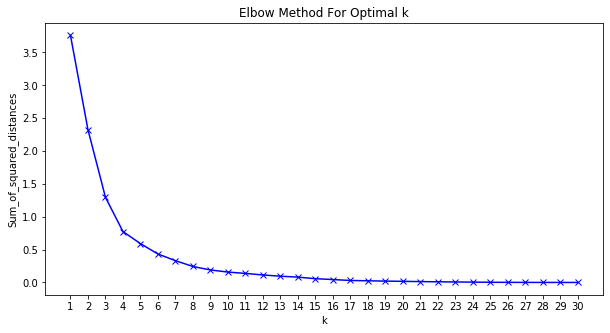

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Transforming data
mms = MinMaxScaler()
mms.fit(data)
transformedData = mms.transform(data)

# calculating Inertia avrage dist. b/w the cluster center and its points
Sum_of_squared_distances = []
K = range(1, 31)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transformedData)
    Sum_of_squared_distances.append(km.inertia_)

# Plotting the Elbow Method Graph
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(K, Sum_of_squared_distances, 'bx-')

plt.xticks(K)
plt.xlabel('k')

# plt.yticks(Sum_of_squared_distances)
plt.ylabel('Sum_of_squared_distances')

plt.title('Elbow Method For Optimal k')
plt.show()

Optimal K is at 4

In [5]:
km = KMeans(n_clusters=4)
km = km.fit(transformedData)

In [6]:
data['labels'] = km.labels_
centers = km.cluster_centers_
y_kmeans = km.predict(transformedData)

## 6.4

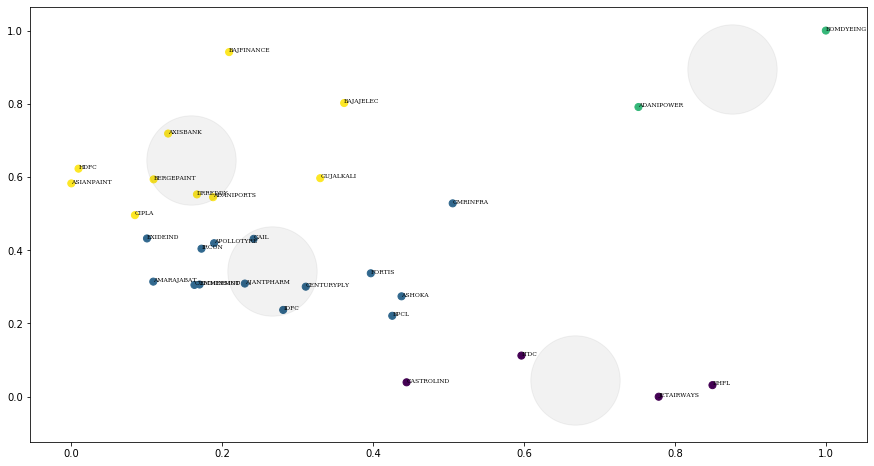

In [7]:


fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(transformedData[:, 0], 
            transformedData[:, 1], 
            c=y_kmeans, 
            s=50, 
            cmap='viridis'
            )
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 6,
        }
for x, y, name in zip(transformedData[:, 0], transformedData[:, 1], data.index):
    ax.text(x, 
            y, 
            name, 
            fontdict=font,
            )

ax.scatter(centers[:, 0], 
           centers[:, 1], 
           c='black', 
           s=8000, 
           alpha=0.05
           )
plt.show()